<a href="https://colab.research.google.com/github/sethu-7/Sentiment_Analysis/blob/main/Embeddings_Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/honors/amazon_reviews_us_Books_v1_02.tsv",sep='\t',on_bad_lines='skip')

In [ ]:
data=data.head(10000)
data.head()
data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,3.366844e+07,4.958554e+08,4.198500,9.328500,12.905700
std,1.531824e+07,2.889539e+08,1.228678,26.490703,29.973029
min,1.206538e+07,6.430000e+03,1.000000,0.000000,0.000000
25%,1.701130e+07,2.458308e+08,4.000000,2.000000,3.000000
50%,3.510044e+07,4.918668e+08,5.000000,4.000000,6.000000
75%,5.006822e+07,7.454314e+08,5.000000,10.000000,14.000000
max,5.309657e+07,9.999939e+08,5.000000,1150.000000,1228.000000


In [ ]:
X=data['review_body']
y=data['star_rating']

In [ ]:
y.head()

0    4.0
1    3.0
2    4.0
3    5.0
4    4.0
Name: star_rating, dtype: float64

In [ ]:
yi=np.array(data['star_rating'])
for i in range (0,len(y)):
  if(yi[i]>2.5):
    np.append(yi[i], 1)
  else:
    np.append(yi[i], 0)

In [ ]:
split_ratio = 0.8
split_idx = int(len(X) * split_ratio)

train_texts =X[:split_idx]
test_texts = X[split_idx:]
train_labels = y[:split_idx]
test_labels = y[split_idx:]
train_labelsi = yi[:split_idx]
test_labelsi = yi[split_idx:]

Loading glove embedding

In [ ]:
glove_path = "/content/drive/MyDrive/honors/glove.42B.300d.txt"

glove_vectors = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.split()
        word = parts[0]
        embedding = np.array(parts[1:], dtype=np.float32)
        glove_vectors[word] = embedding

embedding_dim=300
glove_emb_test=[]
glove_emb_train=[]

for text in train_texts:
    words = text.split()
    embeddings = [glove_vectors.get(word, np.zeros(embedding_dim)) for word in words]
    avg_embedding = np.mean(embeddings, axis=0)
    glove_emb_train.append(avg_embedding)

for text in test_texts:
    words = text.split()
    embeddings = [glove_vectors.get(word, np.zeros(embedding_dim)) for word in words]
    avg_embedding = np.mean(embeddings, axis=0)
    glove_emb_test.append(avg_embedding)

glove_emb_test=np.array(glove_emb_test)
glove_emb_train=np.array(glove_emb_train)

In [ ]:
 print(glove_emb_train[:50])


[[-0.02398167  0.01041366 -0.06166591 ... -0.10772758  0.08006375
   0.07268027]
 [-0.09651737  0.01550689 -0.12645607 ... -0.1304974   0.01916974
  -0.05169478]
 [ 0.00812602 -0.01540322 -0.06767794 ... -0.01836392 -0.0077379
   0.11244501]
 ...
 [-0.02482173  0.00672547 -0.0807268  ... -0.09419221  0.00274962
   0.00209475]
 [ 0.00068361 -0.03925979 -0.05448444 ... -0.0555802   0.03301494
  -0.04323835]
 [-0.03166862  0.03337351 -0.05893276 ... -0.08973011  0.01903575
   0.01087438]]


In [ ]:
 print(glove_emb_test[:50])


[[ 0.00025652  0.08036891 -0.06820914 ... -0.00657104  0.00857716
   0.0071799 ]
 [-0.05479132  0.0068572  -0.04502822 ... -0.0880372   0.02145877
   0.02564279]
 [-0.05601588  0.01859864 -0.01857741 ... -0.06459031 -0.03327606
  -0.00741164]
 ...
 [-0.04427601 -0.00400419 -0.08346788 ... -0.10847833 -0.02384027
   0.03741937]
 [-0.03091971  0.02208335 -0.0664775  ... -0.03019231  0.01333135
  -0.03481897]
 [-0.03819503 -0.03026918 -0.08584798 ... -0.00681757  0.06801972
   0.10522094]]


Fast text model loading

In [ ]:
from gensim.models import KeyedVectors

# Load FastText pre-trained word vectors from .vec file
fasttext_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/honors/wiki-news-300d-1M.vec')

# Generate FastText embeddings for the data
def text_to_embedding(text):
    words = text.split()
    embeddings = [fasttext_model[word] for word in words if word in fasttext_model]
    if embeddings:
        return np.mean(embeddings, axis=0)
    return np.zeros(fasttext_model.vector_size)

fast_emb_train = np.array([text_to_embedding(text) for text in train_texts])
fast_emb_test = np.array([text_to_embedding(text) for text in test_texts])

In [ ]:
print(fast_emb_train[:50])

[[-0.00477119 -0.00086483 -0.02883941 ...  0.16027713  0.01193644
  -0.00390424]
 [-0.05192433  0.00345405 -0.03917568 ...  0.1738838  -0.00194865
   0.00366757]
 [-0.00672941 -0.02272353 -0.00089412 ...  0.16864118  0.06771763
  -0.04021765]
 ...
 [-0.02970001  0.00328485 -0.01524243 ...  0.17768385  0.00806667
  -0.0074303 ]
 [-0.01079264  0.01472206 -0.01257647 ...  0.1526588   0.00235735
  -0.01568235]
 [-0.00569386  0.00175524 -0.02135959 ...  0.14883752  0.01874837
  -0.01827888]]


In [ ]:
print(fast_emb_test[:50])

[[-0.0369475   0.004645   -0.0194475  ...  0.18132502  0.0053225
  -0.01691   ]
 [ 0.01614696 -0.01960987 -0.01762998 ...  0.11896304  0.00315199
  -0.01226582]
 [-0.00233875  0.01168375 -0.01551125 ...  0.12738     0.003615
  -0.01900375]
 ...
 [-0.00339821 -0.00300179 -0.01936607 ...  0.14970894 -0.01272768
  -0.02080535]
 [-0.00754878  0.00572927 -0.03167317 ...  0.14505123 -0.00193902
  -0.02845122]
 [ 0.00394314  0.00916863 -0.0306549  ...  0.15498039  0.01934706
  -0.03245294]]


In [ ]:
# from gensim.models import Word2Vec
# import numpy as np

# # Assuming 'X' is a list of tokenized texts

# # Create a Word2Vec model
# tokenized_texts = [text.split() for text in X]
# word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, sg=1)

# # Access the word vectors using the wv attribute
# word_vectors = word2vec_model.wv.vectors

# # Print the first 50 word vectors
# print(word_vectors[:50])

# import gensim.downloader as api

# word2vec_model= api.load("word2vec-google-news-300")

In [ ]:
# word_arr=np.array(word_vectors)
# word2vec_model.save('/content/drive/MyDrive/honors/w2v.kv')

In [ ]:
from gensim.models import Word2Vec

tokenized_texts1 = [text.split() for text in train_texts]
tokenized_texts2 = [text.split() for text in test_texts]

tokenized_texts=np.append(tokenized_texts1,tokenized_texts2)

embedding_model = Word2Vec(sentences=tokenized_texts, vector_size=300, window=5, min_count=1, sg=1)  # Adjust parameters


# Function to average word vectors for a text
def average_word_vectors(words, model):
    vectors = [model.wv[word] for word in words if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)


word_train_emb = [average_word_vectors(text.split(), embedding_model) for text in train_texts]
word_test_emb = [average_word_vectors(text.split(), embedding_model) for text in test_texts]


# def text_to_embedding(text):
#     words = text.split()
#     embeddings = [fasttext_model[word] for word in words if word in fasttext_model]
#     if embeddings:
#         return np.mean(embeddings, axis=0)
#     return np.zeros(fasttext_model.vector_size)

# word_emb_train = np.array([text_to_embedding(text) for text in train_texts])
# word_emb_test = np.array([text_to_embedding(text) for text in test_texts])


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5438: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(arr)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:1859: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


In [ ]:
add_emb_train=fast_emb_train+glove_emb_train+word_train_emb
add_emb_test=fast_emb_test+glove_emb_test+word_test_emb

In [ ]:
add_emb_train.shape

(8000, 300)

In [ ]:
add_emb_test.shape

(2000, 300)

In [ ]:
# addf_emb=add_emb+word_arr


# reshaped_array = word_arr.reshape((300, 10000))

PERFORMING ADDIITION OF FAST TEXT AND GLOVE AND USING SVM




In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(add_emb_train, train_labels)

# Make predictions
predictions = svm_model.predict(add_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using svm: {accuracy:.4f}")

report = classification_report(test_labels, predictions)

# Print the report


print(report)

Accuracy using svm: 0.6170
              precision    recall  f1-score   support

         1.0       0.51      0.20      0.28       148
         2.0       0.33      0.02      0.04        97
         3.0       0.19      0.02      0.03       165
         4.0       0.00      0.00      0.00       375
         5.0       0.63      0.99      0.77      1215

    accuracy                           0.62      2000
   macro avg       0.33      0.24      0.22      2000
weighted avg       0.45      0.62      0.49      2000



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
add_emb_train=np.abs(add_emb_train)
nb_model.fit(add_emb_train, train_labels)

# Make predictions
predictions = nb_model.predict(add_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using fast text embeddings and naive bayes model: {accuracy:.2f}")

report = classification_report(test_labels, predictions)

# Print the report


print(report)


Accuracy using fast text embeddings and naive bayes model: 0.61
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       148
         2.0       0.00      0.00      0.00        97
         3.0       0.00      0.00      0.00       165
         4.0       0.00      0.00      0.00       375
         5.0       0.61      1.00      0.76      1215

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(add_emb_train, train_labelsi)

# Make predictions
predictions = rf_model.predict(add_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labelsi, predictions)
print(f"Accuracy using rf model: {accuracy:.4f}")

report = classification_report(test_labelsi, predictions)

# Print the report


print(report)


Accuracy using rf model: 0.4005
              precision    recall  f1-score   support

         1.0       0.25      0.01      0.03       148
         2.0       0.00      0.00      0.00        97
         3.0       0.00      0.00      0.00       165
         4.0       0.19      0.47      0.27       375
         5.0       0.58      0.51      0.54      1215

    accuracy                           0.40      2000
   macro avg       0.20      0.20      0.17      2000
weighted avg       0.40      0.40      0.38      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
# conc_emb_reduced_train = np.abs(conc_emb_reduced_train)
dt_model.fit(add_emb_train, train_labelsi)

# Make predictions
predictions = dt_model.predict(add_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labelsi, predictions)
print(f"Accuracy using fast text embeddings and Decision Tree model: {accuracy:.4f}")

report = classification_report(test_labelsi, predictions)

# Print the report
print(report)


Accuracy using fast text embeddings and Decision Tree model: 0.2245
              precision    recall  f1-score   support

         1.0       0.10      0.09      0.10       148
         2.0       0.06      0.32      0.11        97
         3.0       0.06      0.07      0.07       165
         4.0       0.17      0.33      0.23       375
         5.0       0.59      0.22      0.32      1215

    accuracy                           0.22      2000
   macro avg       0.20      0.21      0.16      2000
weighted avg       0.41      0.22      0.25      2000



In [ ]:
sub_emb_train=fast_emb_train-glove_emb_train-word_train_emb
sub_emb_test=fast_emb_test-glove_emb_test-word_test_emb

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, GRU, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(GRU(128)))
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(add_emb_train, train_labels, validation_data=(add_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(add_emb_test)


# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error using Bi GRU: {mae:.4f}")


Epoch 1/10
250/250 [==============================] - 20s 39ms/step - loss: 1.9045 - val_loss: 1.6297
Epoch 2/10
250/250 [==============================] - 13s 50ms/step - loss: 1.5397 - val_loss: 1.5104
Epoch 3/10
250/250 [==============================] - 10s 40ms/step - loss: 1.5280 - val_loss: 1.5425
Epoch 4/10
250/250 [==============================] - 8s 30ms/step - loss: 1.5364 - val_loss: 1.5084
Epoch 5/10
250/250 [==============================] - 9s 34ms/step - loss: 1.5269 - val_loss: 1.6458
Epoch 6/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5370 - val_loss: 1.5316
Epoch 7/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5303 - val_loss: 1.5356
Epoch 8/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5264 - val_loss: 1.5139
Epoch 9/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5256 - val_loss: 1.5190
Epoch 10/10
63/63 [==============================] - 1s 11ms/step
Mean Absolute Error us

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))
# model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


model.fit(add_emb_train, train_labels, validation_data=(add_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(add_emb_test)


# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error using LSTM: {mae:.4f}")



Epoch 1/10
250/250 [==============================] - 7s 22ms/step - loss: 1.9079 - mae: 1.0471 - val_loss: 1.5115 - val_mae: 0.9545
Epoch 2/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5212 - mae: 0.9641 - val_loss: 1.5218 - val_mae: 0.9407
Epoch 3/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5219 - mae: 0.9630 - val_loss: 1.5440 - val_mae: 0.9257
Epoch 4/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5216 - mae: 0.9609 - val_loss: 1.5625 - val_mae: 1.0205
Epoch 5/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5221 - mae: 0.9648 - val_loss: 1.5104 - val_mae: 0.9661
Epoch 6/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5227 - mae: 0.9616 - val_loss: 1.5141 - val_mae: 0.9495
Epoch 7/10
250/250 [==============================] - 6s 23ms/step - loss: 1.5221 - mae: 0.9653 - val_loss: 1.5318 - val_mae: 0.9914
Epoch 8/10
250/250 [==============================] - 4s 18ms/step - 

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128)))  # Bidirectional layer
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(add_emb_train, train_labels, validation_data=(add_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(add_emb_test)

# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error using Bi LSTM: {mae:.4f}")

Epoch 1/10
250/250 [==============================] - 14s 37ms/step - loss: 1.8649 - val_loss: 1.5366
Epoch 2/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5350 - val_loss: 1.5123
Epoch 3/10
250/250 [==============================] - 9s 34ms/step - loss: 1.5332 - val_loss: 1.5097
Epoch 4/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5210 - val_loss: 1.5521
Epoch 5/10
250/250 [==============================] - 8s 34ms/step - loss: 1.5245 - val_loss: 1.5152
Epoch 6/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5204 - val_loss: 1.5099
Epoch 7/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5194 - val_loss: 1.5101
Epoch 8/10
250/250 [==============================] - 8s 34ms/step - loss: 1.5232 - val_loss: 1.5098
Epoch 9/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5182 - val_loss: 1.5112
Epoch 10/10
63/63 [==============================] - 1s 11ms/step
Mean Absolute Error usin

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(GRU(128))  # GRU layer
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(add_emb_train, train_labels, validation_data=(add_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(add_emb_test)

# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error: {mae:.4f}")
# print(f"Accuracy using Decision Tree model: {mae:.4f}")

# report = classification_report(test_labels, predictions)

# Print the report
# print(report)

Epoch 1/10
250/250 [==============================] - 7s 20ms/step - loss: 2.0325 - val_loss: 1.6019
Epoch 2/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5473 - val_loss: 1.5174
Epoch 3/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5280 - val_loss: 1.5508
Epoch 4/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5302 - val_loss: 1.5161
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5271 - val_loss: 1.5107
Epoch 6/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5402 - val_loss: 1.5212
Epoch 7/10
250/250 [==============================] - 4s 18ms/step - loss: 1.5196 - val_loss: 1.5272
Epoch 8/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5262 - val_loss: 1.5100
Epoch 9/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5260 - val_loss: 1.5223
Epoch 10/10
63/63 [==============================] - 1s 6ms/step
Mean Absolute Error: 0.947

PERFORMING SUBTRACTION OF FAST TEXT AND GLOVE AND USING SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(sub_emb_train, train_labels)

# Make predictions
predictions = svm_model.predict(sub_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using svm: {accuracy:.4f}")

report = classification_report(test_labels, predictions)

# Print the report


print(report)

Accuracy using svm: 0.6220
              precision    recall  f1-score   support

         1.0       0.60      0.22      0.33       148
         2.0       0.33      0.02      0.04        97
         3.0       0.33      0.04      0.08       165
         4.0       0.00      0.00      0.00       375
         5.0       0.63      0.99      0.77      1215

    accuracy                           0.62      2000
   macro avg       0.38      0.26      0.24      2000
weighted avg       0.47      0.62      0.50      2000



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
sub_emb_train=np.abs(sub_emb_train)
nb_model.fit(sub_emb_train, train_labels)

# Make predictions
predictions = nb_model.predict(sub_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using fast text embeddings and naive bayes model: {accuracy:.2f}")

report = classification_report(test_labels, predictions)

# Print the report


print(report)


Accuracy using fast text embeddings and naive bayes model: 0.61
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       148
         2.0       0.00      0.00      0.00        97
         3.0       0.00      0.00      0.00       165
         4.0       0.00      0.00      0.00       375
         5.0       0.61      1.00      0.76      1215

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(sub_emb_train, train_labels)

# Make predictions
predictions = rf_model.predict(sub_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using rf model: {accuracy:.4f}")

report = classification_report(test_labels, predictions)

# Print the report


print(report)


Accuracy using rf model: 0.3825
              precision    recall  f1-score   support

         1.0       0.50      0.03      0.06       148
         2.0       0.00      0.00      0.00        97
         3.0       0.00      0.00      0.00       165
         4.0       0.18      0.47      0.26       375
         5.0       0.58      0.48      0.52      1215

    accuracy                           0.38      2000
   macro avg       0.25      0.20      0.17      2000
weighted avg       0.42      0.38      0.37      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
# conc_emb_reduced_train = np.abs(conc_emb_reduced_train)
dt_model.fit(sub_emb_train, train_labels)

# Make predictions
predictions = dt_model.predict(sub_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using fast text embeddings and Decision Tree model: {accuracy:.4f}")

report = classification_report(test_labels, predictions)

# Print the report
print(report)


Accuracy using fast text embeddings and Decision Tree model: 0.1870
              precision    recall  f1-score   support

         1.0       0.07      0.20      0.11       148
         2.0       0.05      0.11      0.07        97
         3.0       0.09      0.25      0.13       165
         4.0       0.19      0.32      0.24       375
         5.0       0.61      0.14      0.23      1215

    accuracy                           0.19      2000
   macro avg       0.20      0.21      0.16      2000
weighted avg       0.42      0.19      0.21      2000



In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, GRU, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(GRU(128)))
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(sub_emb_train, train_labels, validation_data=(sub_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(sub_emb_test)


# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error: {mae:.4f}")


Epoch 1/10
250/250 [==============================] - 13s 37ms/step - loss: 1.9216 - val_loss: 1.5097
Epoch 2/10
250/250 [==============================] - 8s 31ms/step - loss: 1.5307 - val_loss: 1.5266
Epoch 3/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5360 - val_loss: 1.5669
Epoch 4/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5329 - val_loss: 1.5097
Epoch 5/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5261 - val_loss: 1.5121
Epoch 6/10
250/250 [==============================] - 9s 34ms/step - loss: 1.5449 - val_loss: 1.5078
Epoch 7/10
250/250 [==============================] - 8s 31ms/step - loss: 1.5360 - val_loss: 1.5167
Epoch 8/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5311 - val_loss: 1.5391
Epoch 9/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5292 - val_loss: 1.5099
Epoch 10/10
63/63 [==============================] - 1s 8ms/step
Mean Absolute Error: 1.00

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))
# model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


model.fit(sub_emb_train, train_labels, validation_data=(sub_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(sub_emb_test)


# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error using LSTM: {mae:.4f}")


Epoch 1/10
250/250 [==============================] - 8s 23ms/step - loss: 1.8995 - mae: 1.0444 - val_loss: 1.5242 - val_mae: 0.9858
Epoch 2/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5222 - mae: 0.9651 - val_loss: 1.5103 - val_mae: 0.9588
Epoch 3/10
250/250 [==============================] - 4s 18ms/step - loss: 1.5234 - mae: 0.9618 - val_loss: 1.5238 - val_mae: 0.9855
Epoch 4/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5287 - mae: 0.9647 - val_loss: 1.5184 - val_mae: 0.9440
Epoch 5/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5216 - mae: 0.9624 - val_loss: 1.5771 - val_mae: 0.9110
Epoch 6/10
250/250 [==============================] - 4s 18ms/step - loss: 1.5354 - mae: 0.9675 - val_loss: 1.5268 - val_mae: 0.9366
Epoch 7/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5250 - mae: 0.9617 - val_loss: 1.5100 - val_mae: 0.9632
Epoch 8/10
250/250 [==============================] - 4s 17ms/step - 

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128)))  # Bidirectional layer
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(sub_emb_train, train_labels, validation_data=(sub_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(sub_emb_test)

# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error using Bi LSTM: {mae:.4f}")

Epoch 1/10
250/250 [==============================] - 13s 40ms/step - loss: 1.8281 - val_loss: 1.5298
Epoch 2/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5297 - val_loss: 1.5172
Epoch 3/10
250/250 [==============================] - 9s 35ms/step - loss: 1.5244 - val_loss: 1.5279
Epoch 4/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5320 - val_loss: 1.5207
Epoch 5/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5203 - val_loss: 1.5232
Epoch 6/10
250/250 [==============================] - 9s 36ms/step - loss: 1.5195 - val_loss: 1.5165
Epoch 7/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5262 - val_loss: 1.5111
Epoch 8/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5202 - val_loss: 1.5297
Epoch 9/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5195 - val_loss: 1.5209
Epoch 10/10
63/63 [==============================] - 2s 11ms/step
Mean Absolute Error usin

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(GRU(128))  # GRU layer
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(sub_emb_train, train_labels, validation_data=(sub_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(sub_emb_test)

# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error: {mae:.4f}")
# print(f"Accuracy using Decision Tree model: {mae:.4f}")

# report = classification_report(test_labels, predictions)

# Print the report
# print(report)

Epoch 1/10
250/250 [==============================] - 8s 20ms/step - loss: 2.0480 - val_loss: 1.5706
Epoch 2/10
250/250 [==============================] - 4s 18ms/step - loss: 1.5445 - val_loss: 1.5136
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5316 - val_loss: 1.5155
Epoch 4/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5317 - val_loss: 1.5340
Epoch 5/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5308 - val_loss: 1.5258
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5226 - val_loss: 1.5138
Epoch 7/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5230 - val_loss: 1.5603
Epoch 8/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5258 - val_loss: 1.5630
Epoch 9/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5206 - val_loss: 1.5118
Epoch 10/10
63/63 [==============================] - 1s 7ms/step
Mean Absolute Error: 0.926

PERFORMING AVERAGE OF FAST TEXT AND GLOVE AND USING SVM

In [ ]:
avg_emb_train=(fast_emb_train+glove_emb_train+word_train_emb)/3
avg_emb_test=(fast_emb_test+glove_emb_test+word_test_emb)/3

In [ ]:
train_labels.describe()

count    8000.000000
mean        4.196625
std         1.228883
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: star_rating, dtype: float64

In [ ]:
avg_emb_train.shape

(8000, 300)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(avg_emb_train, train_labels)

# Make predictions
predictions = svm_model.predict(avg_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using svm: {accuracy:.4f}")

report = classification_report(test_labels, predictions);

# Print the report


print(report)

Accuracy using svm: 0.6075
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       148
         2.0       0.00      0.00      0.00        97
         3.0       0.00      0.00      0.00       165
         4.0       0.00      0.00      0.00       375
         5.0       0.61      1.00      0.76      1215

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
avg_emb_train=np.abs(sub_emb_train)
nb_model.fit(avg_emb_train, train_labels)

# Make predictions
predictions = nb_model.predict(avg_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using fast text embeddings and naive bayes model: {accuracy:.2f}")

report = classification_report(test_labels, predictions)

# Print the report


print(report)


Accuracy using fast text embeddings and naive bayes model: 0.61
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       148
         2.0       0.00      0.00      0.00        97
         3.0       0.00      0.00      0.00       165
         4.0       0.00      0.00      0.00       375
         5.0       0.61      1.00      0.76      1215

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(avg_emb_train, train_labels)

# Make predictions
predictions = rf_model.predict(avg_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using rf model: {accuracy:.4f}")

report = classification_report(test_labels, predictions)

# Print the report


print(report)


Accuracy using rf model: 0.3075
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       148
         2.0       0.00      0.00      0.00        97
         3.0       0.00      0.00      0.00       165
         4.0       0.19      0.73      0.30       375
         5.0       0.62      0.28      0.39      1215

    accuracy                           0.31      2000
   macro avg       0.16      0.20      0.14      2000
weighted avg       0.41      0.31      0.29      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
# conc_emb_reduced_train = np.abs(conc_emb_reduced_train)
dt_model.fit(avg_emb_train, train_labels)

# Make predictions
predictions = dt_model.predict(avg_emb_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using Decision Tree model: {accuracy:.4f}")

report = classification_report(test_labels, predictions)

# Print the report
print(report)


Accuracy using Decision Tree model: 0.1410
              precision    recall  f1-score   support

         1.0       0.07      0.61      0.13       148
         2.0       0.00      0.00      0.00        97
         3.0       0.10      0.05      0.07       165
         4.0       0.16      0.20      0.18       375
         5.0       0.65      0.09      0.16      1215

    accuracy                           0.14      2000
   macro avg       0.20      0.19      0.11      2000
weighted avg       0.44      0.14      0.14      2000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train a Logistic Regression model
lr_model = LogisticRegression(random_state=42)
# lr_model.fit(avg_emb_train, train_labels)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(avg_emb_train, train_labels)  # apply scaling on training data
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('logisticregression', LogisticRegression())])

# Make predictions
# predictions = lr_model.predict(avg_emb_train)

# Calculate accuracy
# accuracy = accuracy_score(test_labels, predictions)
accuracy=pipe.score(avg_emb_test,test_labels,)
print(f"Accuracy using Logistic Regression model: {accuracy:.4f}")

# report = classification_report(test_labels, predictions)

# Print the report
print(report)


# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error : {mae:.4f}")


Accuracy using Logistic Regression model: 0.0700
              precision    recall  f1-score   support

         1.0       0.09      0.16      0.11       148
         2.0       0.02      0.04      0.03        97
         3.0       0.07      0.21      0.10       165
         4.0       0.18      0.30      0.22       375
         5.0       0.61      0.21      0.31      1215

    accuracy                           0.22      2000
   macro avg       0.19      0.18      0.16      2000
weighted avg       0.41      0.22      0.25      2000

Mean Absolute Error : 1.2622


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
avg_emb_train.shape


(8000, 300)

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Embedding
# from sklearn.metrics import accuracy_score, classification_report

# # Create and preprocess your sequence data
# # For example, you might have sequences of word embeddings like avg_emb_train and avg_emb_test

# # Build the LSTM model
# model = Sequential([
#     Embedding(input_dim=300, output_dim=300, input_length=8000),
#     LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
#     Dense(units=3, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the LSTM model
# model.fit(avg_emb_train, train_labels, epochs=100, batch_size=100)

# # Make predictions
# predictions_probs = model.predict(avg_emb_test)
# predictions = np.argmax(predictions_probs, axis=1)

# # Calculate accuracy
# accuracy = accuracy_score(test_labels, predictions)
# print(f"Accuracy using LSTM model: {accuracy:.4f}")

# report = classification_report(test_labels, predictions)

# # Print the report
# print(report)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, GRU, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(GRU(128)))
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(avg_emb_train, train_labels, validation_data=(avg_emb_train, train_labels), epochs=10, batch_size=32)


Epoch 1/10
250/250 [==============================] - 13s 37ms/step - loss: 1.9570 - val_loss: 1.5103
Epoch 2/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5332 - val_loss: 1.5122
Epoch 3/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5347 - val_loss: 1.5086
Epoch 4/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5411 - val_loss: 1.5444
Epoch 5/10
250/250 [==============================] - 9s 35ms/step - loss: 1.5236 - val_loss: 1.5096
Epoch 6/10
250/250 [==============================] - 8s 31ms/step - loss: 1.5416 - val_loss: 1.5389
Epoch 7/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5304 - val_loss: 1.5172
Epoch 8/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5325 - val_loss: 1.5859
Epoch 9/10
250/250 [==============================] - 8s 30ms/step - loss: 1.5328 - val_loss: 1.5197
Epoch 10/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5280 - val_l

In [ ]:
predictions = model.predict(avg_emb_test)


63/63 [==============================] - 1s 10ms/step


In [ ]:
# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error using bi gru: {mae:.4f}")

Mean Absolute Error using bi gru: 0.9849


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))
# model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


model.fit(avg_emb_train, train_labels, validation_data=(avg_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(avg_emb_test)


# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error using LSTM: {mae:.4f}")


Epoch 1/10
250/250 [==============================] - 7s 20ms/step - loss: 1.8632 - mae: 1.0341 - val_loss: 1.5102 - val_mae: 0.9653
Epoch 2/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5341 - mae: 0.9668 - val_loss: 1.5632 - val_mae: 1.0214
Epoch 3/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5261 - mae: 0.9644 - val_loss: 1.5149 - val_mae: 0.9484
Epoch 4/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5191 - mae: 0.9614 - val_loss: 1.5100 - val_mae: 0.9624
Epoch 5/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5210 - mae: 0.9653 - val_loss: 1.5228 - val_mae: 0.9846
Epoch 6/10
250/250 [==============================] - 4s 18ms/step - loss: 1.5199 - mae: 0.9630 - val_loss: 1.5404 - val_mae: 0.9967
Epoch 7/10
250/250 [==============================] - 4s 18ms/step - loss: 1.5224 - mae: 0.9628 - val_loss: 1.5136 - val_mae: 0.9503
Epoch 8/10
250/250 [==============================] - 5s 20ms/step - 

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128)))  # Bidirectional layer
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(avg_emb_train, train_labels, validation_data=(avg_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(avg_emb_test)

# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error using Bi LSTM: {mae:.4f}")

Epoch 1/10
250/250 [==============================] - 13s 35ms/step - loss: 1.8252 - val_loss: 1.5134
Epoch 2/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5256 - val_loss: 1.5280
Epoch 3/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5233 - val_loss: 1.5133
Epoch 4/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5304 - val_loss: 1.5098
Epoch 5/10
250/250 [==============================] - 8s 34ms/step - loss: 1.5310 - val_loss: 1.5094
Epoch 6/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5195 - val_loss: 1.5114
Epoch 7/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5195 - val_loss: 1.5486
Epoch 8/10
250/250 [==============================] - 9s 34ms/step - loss: 1.5218 - val_loss: 1.5272
Epoch 9/10
250/250 [==============================] - 8s 31ms/step - loss: 1.5203 - val_loss: 1.5099
Epoch 10/10
63/63 [==============================] - 1s 9ms/step
Mean Absolute Error using

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(GRU(128))  # GRU layer
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(avg_emb_train, train_labels, validation_data=(avg_emb_train, train_labels), epochs=10, batch_size=32)

predictions = model.predict(avg_emb_test)

# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error: {mae:.4f}")
# print(f"Accuracy using Decision Tree model: {mae:.4f}")

# report = classification_report(test_labels, predictions)

# Print the report
# print(report)

Epoch 1/10
250/250 [==============================] - 8s 23ms/step - loss: 1.9691 - val_loss: 1.5100
Epoch 2/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5297 - val_loss: 1.5645
Epoch 3/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5366 - val_loss: 1.5121
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5363 - val_loss: 1.5204
Epoch 5/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5312 - val_loss: 1.5127
Epoch 6/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5432 - val_loss: 1.5534
Epoch 7/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5244 - val_loss: 1.5959
Epoch 8/10
250/250 [==============================] - 4s 18ms/step - loss: 1.5216 - val_loss: 1.5160
Epoch 9/10
250/250 [==============================] - 4s 18ms/step - loss: 1.5257 - val_loss: 1.5379
Epoch 10/10
63/63 [==============================] - 1s 8ms/step
Mean Absolute Error: 0.999

**CONCATENATION OF EMBEDDINGS**

In [ ]:
conc_emb_train=np.concatenate((fast_emb_train,glove_emb_train,word_train_emb), axis=0)
conc_emb_test=np.concatenate((fast_emb_test,glove_emb_test,word_test_emb), axis=0)

# print(fast_emb_train[:50])

In [ ]:

# three_dim = PCA(random_state=0).fit_transform(word_vectors)[:,:200]

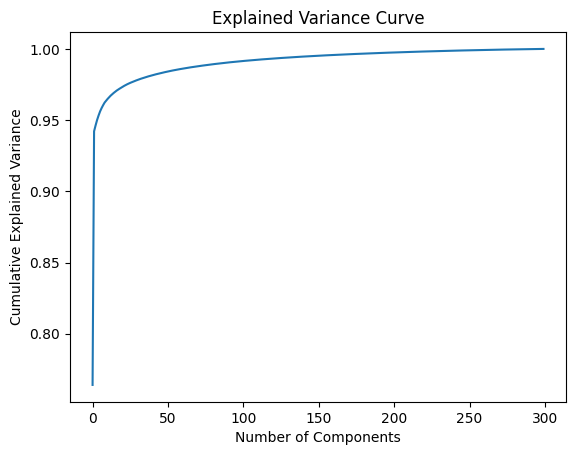

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'conc_emb' contains concatenated embeddings
pca = PCA(random_state=0)
conc_emb_reduced_train= pca.fit_transform(conc_emb_train)[:8000] # Apply PCA transformation
# label_pca=pca.fit_transform(train_labels)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Curve')
plt.show()


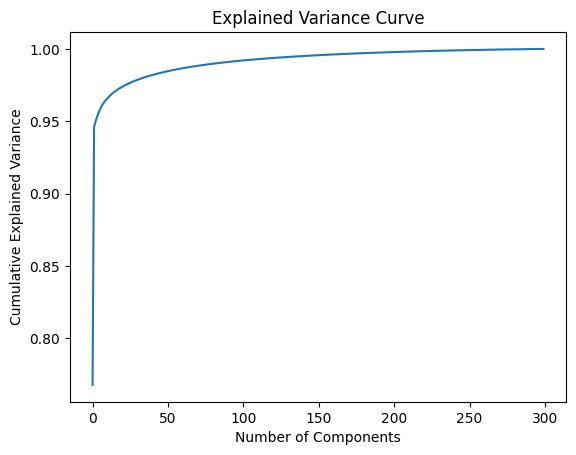

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'conc_emb' contains concatenated embeddings
pca = PCA(random_state=0)
conc_emb_reduced_test= pca.fit_transform(conc_emb_test)[:2000] # Apply PCA transformation
# label_pca=pca.fit_transform(train_labels)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Curve')
plt.show()


In [ ]:
train_labels.describe()

count    8000.000000
mean        4.196625
std         1.228883
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: star_rating, dtype: float64

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svm_model = SVC(kernel='linear', C=1.0)
# train_labels=train_labels[:200]
svm_model.fit(conc_emb_reduced_train, train_labels)

# Make predictions
predictions = svm_model.predict(conc_emb_reduced_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using svm: {accuracy:.4f}")

report = classification_report(test_labels, predictions);

# Print the report


print(report)

Accuracy using svm: 0.6075
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       148
         2.0       0.00      0.00      0.00        97
         3.0       0.00      0.00      0.00       165
         4.0       0.00      0.00      0.00       375
         5.0       0.61      1.00      0.76      1215

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train a Multinomial Naive Bayes model
nb_model = MultinomialNB()
conc_emb_reduced_train=np.abs(conc_emb_reduced_train)
nb_model.fit(conc_emb_reduced_train, train_labels)

# Make predictions
predictions = nb_model.predict(conc_emb_reduced_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using fast text embeddings and naive bayes model: {accuracy:.2f}")

report = classification_report(test_labels, predictions)

# Print the report


print(report)


Accuracy using fast text embeddings and naive bayes model: 0.61
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       148
         2.0       0.00      0.00      0.00        97
         3.0       0.00      0.00      0.00       165
         4.0       0.00      0.00      0.00       375
         5.0       0.61      1.00      0.76      1215

    accuracy                           0.61      2000
   macro avg       0.12      0.20      0.15      2000
weighted avg       0.37      0.61      0.46      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(conc_emb_reduced_train, train_labels)

# Make predictions
predictions = rf_model.predict(conc_emb_reduced_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using rf model: {accuracy:.4f}")

report = classification_report(test_labels, predictions)

# Print the report


print(report)


Accuracy using rf model: 0.2820
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       148
         2.0       0.00      0.00      0.00        97
         3.0       0.05      0.03      0.04       165
         4.0       0.19      0.71      0.30       375
         5.0       0.59      0.24      0.34      1215

    accuracy                           0.28      2000
   macro avg       0.17      0.20      0.14      2000
weighted avg       0.40      0.28      0.27      2000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
# conc_emb_reduced_train = np.abs(conc_emb_reduced_train)
dt_model.fit(conc_emb_reduced_train, train_labels)

# Make predictions
predictions = dt_model.predict(conc_emb_reduced_test)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy using Decision Tree model: {accuracy:.4f}")

report = classification_report(test_labels, predictions)

# Print the report
print(report)


Accuracy using Decision Tree model: 0.2165
              precision    recall  f1-score   support

         1.0       0.09      0.16      0.11       148
         2.0       0.02      0.04      0.03        97
         3.0       0.07      0.21      0.10       165
         4.0       0.18      0.30      0.22       375
         5.0       0.61      0.21      0.31      1215

    accuracy                           0.22      2000
   macro avg       0.19      0.18      0.16      2000
weighted avg       0.41      0.22      0.25      2000



In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))
# model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
model.fit(conc_emb_reduced_train, train_labels, validation_data=(conc_emb_reduced_train, train_labels), epochs=10, batch_size=32)


Epoch 1/10
250/250 [==============================] - 14s 22ms/step - loss: 1.8820 - mae: 1.0362 - val_loss: 1.5102 - val_mae: 0.9591
Epoch 2/10
250/250 [==============================] - 6s 24ms/step - loss: 1.5265 - mae: 0.9630 - val_loss: 1.5382 - val_mae: 0.9290
Epoch 3/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5225 - mae: 0.9625 - val_loss: 1.5306 - val_mae: 0.9907
Epoch 4/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5240 - mae: 0.9639 - val_loss: 1.5130 - val_mae: 0.9513
Epoch 5/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5322 - mae: 0.9668 - val_loss: 1.5113 - val_mae: 0.9551
Epoch 6/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5199 - mae: 0.9621 - val_loss: 1.5133 - val_mae: 0.9737
Epoch 7/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5234 - mae: 0.9641 - val_loss: 1.5267 - val_mae: 0.9878
Epoch 8/10
250/250 [==============================] - 5s 20ms/step -

In [ ]:
predictions = model.predict(conc_emb_reduced_test)


63/63 [==============================] - 2s 7ms/step


In [ ]:
test_labels.head()

8000    5.0
8001    5.0
8002    4.0
8003    4.0
8004    5.0
Name: star_rating, dtype: float64

In [ ]:
# predictions=pd.DataFrame(predictions)
# predictions.head()

In [ ]:
# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error: {mae:.4f}")


Mean Absolute Error: 0.9755


In [ ]:
from collections import Counter


# Assuming 'data' is a list of text samples or sentences
all_words = [word for sentence in X for word in sentence.split()]
word_counts = Counter(all_words)
vocab_size = len(word_counts)


print(vocab_size)


126925


In [ ]:
# Assuming 'data' is a list of text samples
max_length = max(len(sentence.split()) for sentence in X)
print(max_length)

6584


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128)))  # Bidirectional layer
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_absolute_error')




In [ ]:
model.fit(conc_emb_reduced_train, train_labels, validation_data=(conc_emb_reduced_train, train_labels), epochs=10, batch_size=32)


Epoch 1/10
250/250 [==============================] - 59s 37ms/step - loss: 0.9304 - val_loss: 0.8561
Epoch 2/10
250/250 [==============================] - 9s 34ms/step - loss: 0.8266 - val_loss: 0.8115
Epoch 3/10
250/250 [==============================] - 9s 35ms/step - loss: 0.8195 - val_loss: 0.8162
Epoch 4/10
250/250 [==============================] - 8s 31ms/step - loss: 0.8254 - val_loss: 0.8174
Epoch 5/10
250/250 [==============================] - 8s 33ms/step - loss: 0.8196 - val_loss: 0.8088
Epoch 6/10
250/250 [==============================] - 8s 33ms/step - loss: 0.8245 - val_loss: 0.8083
Epoch 7/10
250/250 [==============================] - 8s 31ms/step - loss: 0.8138 - val_loss: 0.8253
Epoch 8/10
250/250 [==============================] - 9s 35ms/step - loss: 0.8141 - val_loss: 0.8149
Epoch 9/10
250/250 [==============================] - 8s 32ms/step - loss: 0.8204 - val_loss: 0.8209
Epoch 10/10
250/250 [==============================] - 8s 31ms/step - loss: 0.8140 - val_l

In [ ]:
predictions = model.predict(conc_emb_reduced_test)


63/63 [==============================] - 1s 8ms/step


In [ ]:
# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error using bi LSTM: {mae:.4f}")


Mean Absolute Error using bi LSTM: 0.8058


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(GRU(128))  # GRU layer
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(conc_emb_reduced_train, train_labels, validation_data=(conc_emb_reduced_train, train_labels), epochs=10, batch_size=32)


Epoch 1/10
250/250 [==============================] - 8s 20ms/step - loss: 2.0120 - val_loss: 1.5116
Epoch 2/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5469 - val_loss: 1.5239
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5350 - val_loss: 1.5178
Epoch 4/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5384 - val_loss: 1.5248
Epoch 5/10
250/250 [==============================] - 4s 18ms/step - loss: 1.5296 - val_loss: 1.5184
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5270 - val_loss: 1.5355
Epoch 7/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5324 - val_loss: 1.5972
Epoch 8/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5301 - val_loss: 1.5103
Epoch 9/10
250/250 [==============================] - 5s 20ms/step - loss: 1.5299 - val_loss: 1.5597
Epoch 10/10
250/250 [==============================] - 4s 17ms/step - loss: 1.5299 - val_lo

In [ ]:
predictions = model.predict(conc_emb_reduced_test)


63/63 [==============================] - 1s 7ms/step


In [ ]:
# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error: {mae:.4f}")
# print(f"Accuracy using Decision Tree model: {mae:.4f}")

# report = classification_report(test_labels, predictions)

# Print the report
# print(report)

Mean Absolute Error: 1.0036


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, GRU, Dense

vocab_size = 10000  # Adjust based on your vocabulary size
embedding_dim = 300
max_sequence_length = 300  # Adjust based on your maximum review length

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(GRU(128)))
model.add(Dense(1, activation='linear'))  # Assuming rating is a numerical value

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(conc_emb_reduced_train, train_labels, validation_data=(conc_emb_reduced_train, train_labels), epochs=10, batch_size=32)


Epoch 1/10
250/250 [==============================] - 13s 37ms/step - loss: 1.9845 - val_loss: 1.5181
Epoch 2/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5374 - val_loss: 1.5195
Epoch 3/10
250/250 [==============================] - 8s 31ms/step - loss: 1.5426 - val_loss: 1.5461
Epoch 4/10
250/250 [==============================] - 8s 32ms/step - loss: 1.5354 - val_loss: 1.6588
Epoch 5/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5532 - val_loss: 1.5636
Epoch 6/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5285 - val_loss: 1.5136
Epoch 7/10
250/250 [==============================] - 8s 34ms/step - loss: 1.5385 - val_loss: 1.5789
Epoch 8/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5306 - val_loss: 1.5107
Epoch 9/10
250/250 [==============================] - 8s 33ms/step - loss: 1.5305 - val_loss: 1.5152
Epoch 10/10
250/250 [==============================] - 8s 34ms/step - loss: 1.5294 - val_l

In [ ]:
predictions = model.predict(conc_emb_reduced_test)


63/63 [==============================] - 1s 10ms/step


In [ ]:
# Calculate accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, predictions)
print(f"Mean Absolute Error with bi gru: {mae:.4f}")
# print(f"Accuracy using Decision Tree model: {mae:.4f}")

# report = classification_report(test_labels, predictions)

# Print the report
# print(report)

Mean Absolute Error with bi gru: 1.2622
